# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/dezeenAI /mydrive
!ls /mydrive

classes.gsheet		 dezeen_3-dataset.ipynb		  dezeenAI
darknet			 dezeen_4-model.ipynb		  files
data			 dezeen_5-database.ipynb	  LICENSE
dezeen_1-scrape.ipynb	 dezeen_6-colorrecognition.ipynb  OIDv4_ToolKit
dezeen_2-download.ipynb  dezeen_7-test.ipynb		  README.md


In [3]:
%cd /mydrive

/content/gdrive/My Drive/Colab Notebooks/dezeenAI


## Libraries & functions
- `requests` - http handling
- `BeautifulSoup` - html parsing & web-scraping
- `urllib.request` - url-opening
- `tqdm` - loop progress bar
- `numpy` - linear algebra
- `pandas` - data manipulation & analysis
- `sys` - system-specific parameters & functions

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn.cluster import KMeans

# import json
# import pandas as pd
# import numpy as np
# from tqdm import tqdm
# import timeit
# import cv2
# import matplotlib.pyplot as plt
# %matplotlib inline
# import os



In [6]:
import cv2
from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

img = '/mydrive/data/dezeen/167/wf0z2635_dev.jpg'
clusters = 5
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)

[[ 46  17  15]
 [  6  80 157]
 [177 101  91]
 [223 180 157]
 [ 92  66  74]]


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


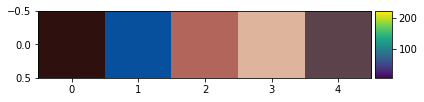

In [7]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

indices = np.array([[n for n in range(clusters)]])
# indices = np.random.randint(0, len(colors), size=(1,5))



io.imshow(colors[indices]);

# New approach

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import argparse
import cv2

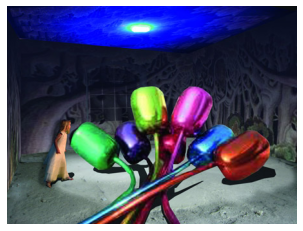

In [54]:
## construct the argument parser and parse the arguments when executing in cmdline
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True, help="Path to image")
#ap.add_argument("-c", "--clusters", required=True, type = int,
               #help="number of clusters")
#args = vars(ap.parse_args())

# number of clusters
clusters = 10

# load the image and do conversions
image = cv2.imread('/mydrive/data/dezeen/12042/koons-v2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show image
plt.figure()
plt.axis("off")
plt.imshow(image)

# reshape the image to a list of pixels
image = image.reshape((image.shape[0] * image.shape[1],3))

In [55]:
# cluster the color in the image
clt = KMeans(n_clusters=clusters)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
import numpy as np

def centroid_histrogram(clt):
    # number of clusters
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1)
    # histrogram of the number of pixels
    (hist,_) = np.histogram(clt.labels_, bins = numLabels)
    
    # normalize the histrogram, such that it sums to one'
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist

In [61]:
def plot_color(hist, centroids):
    # init the rectable size
    bar = np.zeros((50,300,3), dtype="uint8")
    startX = 0
    
    # loop over the percentage of each color cluster and the color of eahc cluster
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent*300)
        cv2.rectangle(bar,(int(startX),0),(int(endX),50),
                          color.astype("uint8").tolist(),-1)
        startX = endX
    
    return bar

In [62]:
# checking the array dimensions

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

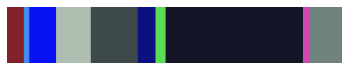

In [63]:
hist = centroid_histrogram(clt)
bar = plot_color(hist, clt.cluster_centers_)

# display
plt.figure()
plt.axis("off")
valid_imshow_data(bar)
plt.imshow(bar)
plt.show()

https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036
https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/
https://i.pinimg.com/236x/31/07/e7/3107e7aded0502e633a6f9b5cda52991--colour-palettes-colour-schemes.jpg
https://github.com/rodartha/ColorPalette/